<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Creating anime characters using Deep Convolutional Generative Adversarial Networks (DCGANs) and PyTorch**


Estimated time needed: **60** minutes


Imagine that you are working for a video game company known for its renowned games featuring unique characters tailored to each player. As the player base continues to expand, the task of manually designing characters for millions of players becomes nearly impossible. Your boss aims to maintain the ability to create distinct characters within the game, and you have been assigned the responsibility of finding a solution to address this challenge. <br>

__Generative adversarial networks (GANs) might help!__<br>
It is a class of machine learning frameworks, first published in June 2014 <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. <br>
GANs can generate new data that follows the statistical features of the data in the training set. GANs are widely used to generate new and realistic photographs that are authentic to human observers. <br>

Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Applying the CNNs to GANs models could help us in building a photo generating model. The combined method is called Deep Convolutional Generative Adversarial Networks (DCGANs). <br>

In this lab, we will first focus on simulated data to better understand GANs. <br> 
Further, we will use the case of massive anime avatar production to introduce how to use DCGANs.<br>
__You will create anime characters like the ones below in this project.__

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/face_cartton.png" width="700" alt="Skills Network Logo">


----
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown4.jpeg" width="50%"></center>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Loading-Pre-trained-model-(100-epochs)">Loading Pre-trained model (100 epochs)</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Basic:-Generative-Adversarial-Networks-(GANs)">Basic: Generative Adversarial Networks (GANs)</a>
        <ol>
            <li><a href="#Introduction">Introduction</a></li>
            <li><a href="#Toy-Data">Toy Data</a></li>
            <li><a href="#The-Generator">The Generator</a></li>
            <li><a href="#The-Loss-Function-GANs-(Optional)">The Loss Function GANs (Optional)</a></li>
            <li><a href="#Training-GANs">Training GANs</a></li>
        </ol>
    </li>
    <li>
        <a href="#Deep-Convolutional-Generative-Adversarial-Networks-(DCGANs)">Deep Convolutional Generative Adversarial Networks (DCGANs)</a></li>
        <ol>
            <li><a href="#Case-background">Case background</a></li>
            <li><a href="#Loading-the-Dataset">Loading the Dataset</a></li>
            <li><a href="#Creating-Data-Generator">Creating Data Generator</a></li>
            <li><a href="#Generator-and-Discriminator-(for-DCGANs)">Generator and Discriminator  (for DCGANs)</a></li>
            <li><a href="#Defining-Loss-Functions">Defining Loss Functions</a></li>
            <li><a href="#Defining-Optimizers">Defining Optimizers</a></li>
            <li><a href="#Create-Train-Step-Function">Create Train Step Function</a></li>
            <li><a href="#Training-DCGANs">Training DCGANs</a></li>
        </ol>
    <li>
    <a href="#Explore-Latent-Variables">Explore Latent Variables</a>
        <ol>
            <li><a href="#Exercise-1">Exercise 1</a></li>
            <li><a href="#Exercise-2">Exercise 2</a></li>
            <li><a href="#Exercise-3">Exercise 3</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab, you will be able to:

- __Understand__ the original formulation of GANs, and their two separately trained networks: Generator and Discriminator
- __Implement__ GANs on simulated and real datasets
- __Apply__ DCGANs to a dataset 
- __Understand__ how to train DCGANs 
- __Generate__ an image using a DCGAN
- __Understand__ how changing the input of the latent space of DCGANs changes the generated image 


----


## Setup


For this lab, we will be using the following libraries:

*   [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical and array operations.
*   [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [torchvision](https://pytorch.org/vision/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for deep learning and neural network-related functions.
*   [torch](https://pytorch.org/docs/stable/torch.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for multi-dimensional tensors and mathematical operations over tensors.
*   [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [PIL](https://pillow.readthedocs.io/en/stable/handbook/concepts.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX05WUEN3552-2023-01-01) for loading images.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_

_You need ~1 minute to import._


In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from  torch.distributions.multivariate_normal import MultivariateNormal
from torch.optim import lr_scheduler
from tqdm import tqdm
from IPython import display

import torchvision.utils as vutils
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from torchvision.transforms import ToPILImage


import os
from os import listdir
from pathlib import Path
import imghdr
import skillsnetwork

### Loading Pre-trained model (100 epochs)

Training a Generative Adversarial Network (GAN) with only one epoch can be a time-consuming process. If our goal is to evaluate the performance of a fully trained and optimized GAN, it becomes necessary to increase the number of epochs.

Therefore, in order to expedite the training process and avoid excessively long training times for this lab, we will simplify the procedure by providing you with the option to download the pre-trained parameters of the Generator network. By utilizing these pre-trained parameters, you will be able to obtain a pre-trained Generator model, which can be directly employed to generate images. This model is calculated using all the 63.6K images from [Kaggle - Anime Face Dataset](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01).


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0A52EN/G_trained.pth
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0A52EN/D_trained.pth

--2026-01-06 22:52:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0A52EN/G_trained.pth
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15238089 (15M) [binary/octet-stream]
Saving to: ‘G_trained.pth’

G_trained.pth       100%[===================>]  14.53M  35.6MB/s    in 0.4s    

2026-01-06 22:52:47 (35.6 MB/s) - ‘G_trained.pth’ saved [15238089/15238089]

--2026-01-06 22:52:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0A52EN/D_trained.pth
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104,

### Defining Helper Functions


In [4]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):
    
    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')
    
    if discriminator:
        max_=torch.max(real_data.max(),generated_data.max().detach())
        min_=torch.min(real_data.min(),generated_data.min().detach())
        x=torch.linspace(start=min_, end=max_, steps=100)
        plt.plot(x.numpy(),discriminator(x.view(-1,1)).detach().view(-1).numpy(),label='discriminator',color='k')
        plt.plot(x.numpy(),0.5*np.ones(x.shape),label='0.5',color='b')
        plt.legend()
        plt.show()

In [5]:
# plot batch of images
def plot_image_batch(my_batch):

  fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
  img_num=0
  for i in range(8):
      for j in range(8):
          ax = axes[i][j]
          img_num+=1
  
          ax.imshow(np.transpose(vutils.make_grid(my_batch[img_num].to(device), padding=2, normalize=True).cpu(),(1,2,0)))
  plt.show()

In [6]:
def get_accuracy(X,Xhat):
    total=0
    py_x=D(X)
    total=py_x.mean()
    py_x=D(Xhat)
    total+=py_x.mean()
    return total/2

----


## Basic: Generative Adversarial Networks (GANs)


### Introduction


__Generative Adversarial Networks (GANs)__ are generative models that convert random samples of one distribution into another distribution. They have several applications, like the following:

*  Generate Examples for Image Datasets
*  Generate Photographs of Human Faces
*  Generate Realistic Photographs
*  Generate Cartoon Characters
*  Image-to-Image Translation
*  Text-to-Image Translation
*  Face Frontal View Generation
*  Generate New Human Poses
*  Face Aging
*  Photo Blending
*  Super Resolution
*  Photo Inpainting
*  Clothing Translation
*  Video Prediction

In this GANs section of the Lab, we will use a toy example to help understand the basic theoretical principles behind GANs. The original form of GANs consisted of a discriminator and a generator; let's use the analogy of a currency forger and the police.

The Generator is the currency forger, and the output is the counterfeit, for example, a 100-dollar bill. The discriminator is analogous to the police, taking the counterfeit and trying to determine if it's real by comparing it to a genuine $100 bill. In real life, if the counterfeit is easy to detect, the forger will adapt; conversely, the police will also improve. GANs emulate this game of cat and mouse.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/General%20diagram.png" alt="generator image" width="700px"></center>

What makes GANs interesting is that the __discriminator and generator continuously improve__ through a well-formulated cost function that backpropagates the errors. GANs are a family of algorithms that use learning by comparison. In the lab, we will review the original formulation and utilize a simulated dataset. We will also introduce you to more advanced methods and discuss issues that you may encounter with real datasets for the next lab.


### Toy Data

Consider the following data, $\mathbf{x}$, that is normally distributed, $\mathbf{x} \sim \mathcal{N}(\mathbf{x}|10,0.1)$, with a mean of 10 and a standard deviation of 0.1. Now, we would like to randomly sample data from this distribution.


In [7]:
class Dataset(Dataset):
    def __init__(self, covariance_matrix, mean,n_samples=1000):
        self.obj =  MultivariateNormal(loc=mean, covariance_matrix=covariance_matrix)
        self.mean=mean
        self.covariance_matrix=covariance_matrix
        self.X=torch.tensor([[self.obj.sample()] for n in range(n_samples)])
        
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        
        return self.X[idx,:]

In [8]:
n_samples=10000
mean=10*torch.ones(1)
covariance_matrix=0.1*torch.eye(1)

dataset=Dataset(covariance_matrix=covariance_matrix, mean=mean,n_samples=n_samples)

We also have the data sample, z, which is also normally distributed $\mathbf{z} \sim \mathcal{N}(\mathbf{z}|0,1) $, with mean of 0 and a standard deviation of 2:



In [9]:
Z=torch.randn(n_samples,1)

In [10]:
print("mean:",Z.mean())
print("standard deviation:",Z.std())

mean: tensor(0.0076)
standard deviation: tensor(0.9981)


Let's compare the two distributions:


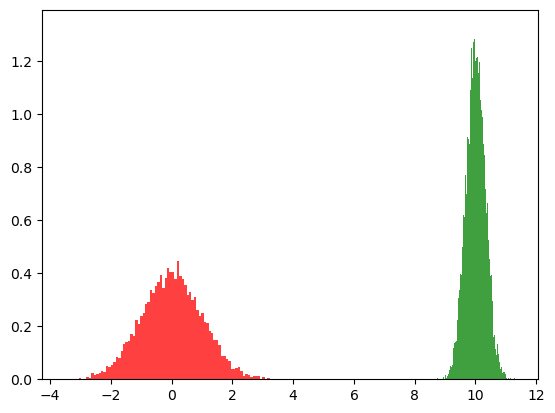

In [11]:
plot_distribution(real_data=dataset.X,generated_data=Z)

Let's create our first generative model by adding 10 to every sample of $z$. We will call the result $\hat{\mathbf{x}}$  as it's an approximation of $\mathbf{x}$. It is not too difficult to show that $\hat{\mathbf{x}} \sim \mathcal{N}(\mathbf{x}|10,1)$.$ Xhat=Z+10 $


In [12]:
Xhat=Z+10

We see that the mean and standard deviation are almost identical, you can multiply $Z$ by a constant to adjust the standard deviation 


In [13]:
print("mean:",Xhat.mean())
print("standard deviation:",Xhat.std())

mean: tensor(10.0076)
standard deviation: tensor(0.9981)


Similarly for the histograms 


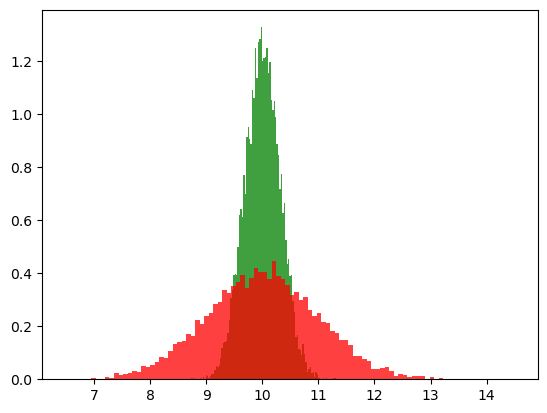

In [14]:
plot_distribution(real_data=dataset.X,generated_data=Xhat)

In the given scenario, by simply adding 10 to the latent variable $z$, we are transforming it using a deterministic function. Consequently, this type of generative model can be referred to as an implicit generative model.


### The Generator


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown.png" width="300px">

There are two networks involved in a GAN, the Generator and the Discriminator. Let's understand the Generator network first.

The Generator is a neural network denoted by $G$; the idea is that a neural network can approximate any function (by the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01)), so you should be able to generate data samples from any type of distribution. 

Our goal is to convert the samples, $\mathbf{z}$, to one that approximates $\hat{\mathbf{x}}$,  i.e $\hat{\mathbf{x}}=G(\mathbf{z})$. Let's build a simple Generator $G(\mathbf{z})=\mathbf{W}^{T}\mathbf{z}+\mathbf{b} $ using PyTorch.

The following is a function that outputs a generator using PyTorch model object.


In [15]:
class Generator(nn.Module):
    def __init__(self,input_dim=1):
        super(Generator,self).__init__()
        self.l1=nn.Linear(1,input_dim)
    
    def forward(self, x):
        return self.l1(x)
G=Generator()

We can utilize the Generator to transform $\mathbf{z}$ and generate a prediction $\hat{\mathbf{x}}$. By comparing the histograms of the distributions of $\hat{\mathbf{x}}$ and $\mathbf{x}$, we can observe notable disparities since the model is untrained.


### The Discriminator 


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown1.png" width="300px">

The discriminator, denoted as $D(\mathbf{x})$, is a neural network that is trained to differentiate between real and generated samples. In its simplest form, the discriminator can be implemented as a logistic regression function. To create a discriminator using Keras, we can utilize a single Dense layer. The logistic function, which is used to determine the probability of the sample being real or generated, will be incorporated in the cost function. This approach follows the convention typically followed in PyTorch.


In [16]:
class Discriminator(nn.Module):
    def __init__(self,input_dim=1):
        super(Discriminator,self).__init__()
        self.l1=nn.Linear(1,input_dim)
    
    def forward(self, x):
        return torch.sigmoid(self.l1(x))

D=Discriminator() 

In [17]:
D

Discriminator(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

The discriminator and generator are randomly initialized, but we can plot the output of each and compare it to the true data distribution. In the plot, the generated data is represented in red, while the real data is represented in green. The logistic function is used as a function of the x-axis. Additionally, we include a threshold value. If the output of the logistic function is less than 0.5, the sample is classified as generated data. Conversely, if the output is greater than 0.5, the sample is classified as data that came from the real dataset.


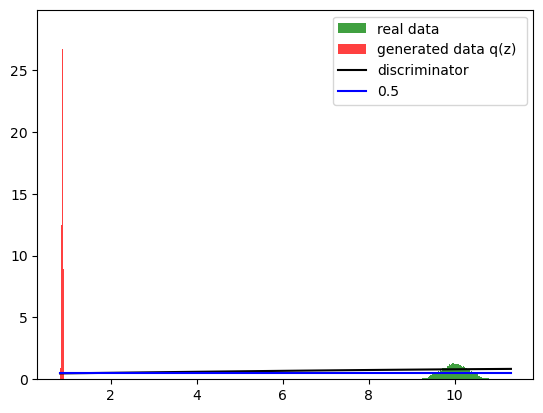

In [18]:
n_samples=1000
Xhat=G(torch.randn(n_samples,1))
plot_distribution(real_data=dataset.X,generated_data=Xhat.detach(),discriminator=D)

Applying the sigmoid function to the discriminator output, we obtain probabilities indicating whether the samples belong to the real distribution. By setting a threshold of 0.5, we can determine the discriminator's classification for each sample.

In the case of the real data, the discriminator correctly classifies all 5000 samples by assigning a probability greater than 0.5.


In [19]:
py_x=D(dataset.X)
torch.sum(py_x>0.5)/len(py_x)

tensor(1.)

For the random samples we get 


In [20]:
py_x=D(Z)
torch.sum(py_x>0.5)/len(py_x)

tensor(0.0750)

In [21]:
Z

tensor([[-1.3182],
        [ 0.1380],
        [ 0.5882],
        ...,
        [-0.0751],
        [ 1.0266],
        [-1.3148]])

In [22]:
get_accuracy(dataset.X,Xhat)

tensor(0.6420, grad_fn=<DivBackward0>)

We can also use the following to find the average value of the sigmoid function for all the samples.  


In many cases, we can instead study the difference in the distribution; in this case, the discriminator is called a <a href='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/2107.06700.pdf'>Critic</a>, a real-valued function.


### The Loss Function GANs (Optional) 
GANs convert an unsupervised learning problem to a supervised one. Instead of formulating the problem like a two-player minimax game with a value function like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>, we can treat the problem of maximizing the familiar log-likelihood of the logistic function analogous to minimizing the cross-entropy loss, then incorporate the generator and discriminator.

___Discriminator___

In order to train the GANS, we start off with standard maximization of the likelihood for the discriminator for the standard dataset $\mathcal{D}=\{{(x_1, y_1), ..., (x_N, y_N)}\}$:

$$V(D)=\sum_{n=1}^N \left( y_n \ln(D(\mathbf{x}_n))+(1-y_n) \ln(1-D(\mathbf{x}_n))\right)$$

Where $y=1$ for samples from the true distribution and $y=0$ for samples from the generator. The goal is to maximize this term with respect to $D$:

$$max_{D}(V(D))$$


To also incorporate the generated samples, we augment the right side of the equation with the generated $k$th sample $\hat{\mathbf{x}}_k$. As they are not part of the dataset $k \notin \mathcal{D} $, we have to include a second summation where $y=0$. Finally, combining the cases of $y=1$ and $y=0$, we get:

$$V(D)=\sum_{ n	\in \mathcal{D}}  \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(\hat{\mathbf{x}}_k) ) $$


___Generator___ 

For the generator we simply replace $\hat{\mathbf{x}}_k$ with the $G(\mathbf{z}_k)$ . 


$$V(G,D)=\sum_{n	\in \mathcal{D}} \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k))) $$

As this is a density estimation problem, it is common to replace the summation with the expected value like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. We replace the summations with an expectation where $p(\mathbf{x})$ is the true distribution and $p(\mathbf{z})$ is the distribution of $\mathbf{z}$.


$$V(D,G)=\mathbb{E}_{x\sim p(\mathbf{x})} \ln(D(\mathbf{x})) + \mathbb{E}_{\mathbf{z} \sim p(\mathbf{z})} \ln(1-D(G(\mathbf{z}) )) $$

As we are trying to trick the discriminator, we would like to find a $G$ that minimize the above expression, such as:

$$min_{G} max_{D} V(D,G)$$


### Training GANs 

GANs are quite difficult to train, even for a simple example. Let's start off with training the generator in practice. 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown3.jpeg" width="500px">

___Training Generator___

$log(1 − D(G(\mathbf{z})))$ is difficult to work with as $D(G(\mathbf{z}))$ is near one or zero for the first few iterations. This is because the generator is not yet properly trained, and the discriminator can easily distinguish between the generated and actual samples. Therefore we maximize $log(D(G(\mathbf{z}_k)) )$.
 
Although the output of the generator passes through the discriminator, we do not update the generator in the optimization step, hence we set the parameter **```training=False```** in the actual training steps.

Instead of maximizing the term, we can take the negative and minimize it. The resultant expression can be calculated in PyTorch using the cross-entropy loss where all the target values are set to one:

$$\sum_{k 	\notin \mathcal{D}} log(1 - D(G(\mathbf{z}_k)) )$$

We start off eith the ```nn.BCELoss()```


In [23]:
criterion=nn.BCELoss()

To convert, we apply the following formula in the training loop


In [24]:
criterion(D(G(Z)),torch.zeros(Z.shape[0],1))

tensor(0.6467, grad_fn=<BinaryCrossEntropyBackward0>)

__Training Discriminator__

We can also use the cross-entropy to train the discriminator; we simply multiply $V(G,D)$ by a negative number, set $y=0$ for the generated values and $y=1$ for the real values. We do not update the generator parameters. 

$$V(G)=\sum_{n	\in \mathcal{D}} (\ln(D(\mathbf{x}_n)))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k) )) $$


The first term is the real loss and the second is the fake loss in PyTorch.


In [25]:
criterion(D(dataset.X),torch.ones(len(dataset),1))+criterion(D(G(Z)),torch.zeros(Z.shape[0],1))/2

tensor(0.5369, grad_fn=<AddBackward0>)

We create the optimizer for the discriminator and generator:


In [26]:
# Learning rate for optimizers
lr = 0.1

# Beta1 hyperparam for Adam optimizers
beta1 = 0.1

G=Generator()
D=Discriminator()

optimizerG=optim.Adam(G.parameters(),lr=lr,betas=(beta1, 0.999))
optimizerD=optim.Adam(D.parameters(),lr=lr,betas=(beta1, 0.999))

We now train the model; as the dataset is small, we will use batch gradient descent. 

For each iteration we will generate $M$ real examples $\{\mathbf{x}_{1}, ...,\mathbf{x}_{M}\}$, these are from the generating distribution $p(\mathbf{x})$. This would be our actual dataset if we used real data.  

We will then generate a sample batch of $M$ noise samples $\{\mathbf{z}_{1}, ...,\mathbf{z}_{M}\}$ from noise prior $p(\mathbf{z})$ and convert the result to a generated image using the generator $\{\hat{\mathbf{x}}_{1}, ...,\hat{\mathbf{x}}_{M}\}$. 

We determine the output of the discriminator for both the real and generated samples. We calculate the loss and then update the discriminator and generator through their respective stochastic gradients.


The convergence of GAN training is a subject in itself. But let's explore a method that works for this simple dataset. Intuitively, we know that if our generated data is identical to our actual data, the probability of correctly classifying is random. Therefore if the generated and actual data are of equal proportion, $D(\mathbf{x}_n)=0.5$ and $D(\hat{\mathbf{x}}_n)=0.5$.  

We only display iterations where the average discriminator output gets closer to 50% for both the generated data and actual data.


In [27]:
batch_size=100

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True)

  0%|          | 0/20 [00:00<?, ?it/s]

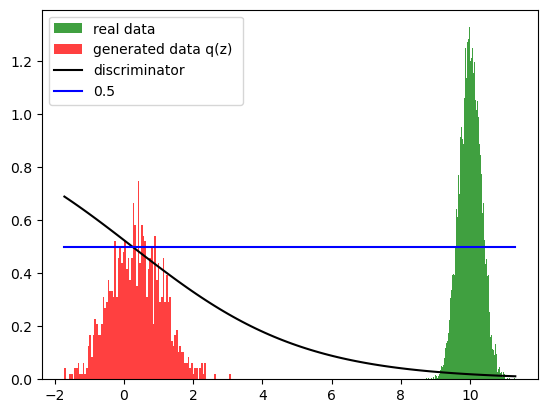

  5%|▌         | 1/20 [00:00<00:14,  1.27it/s]

Epoch: 0


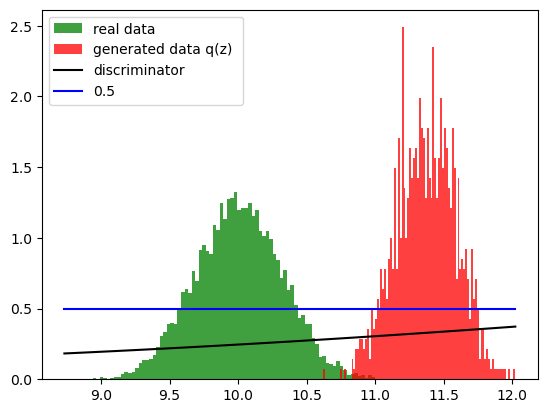

 10%|█         | 2/20 [00:01<00:17,  1.03it/s]

Epoch: 1


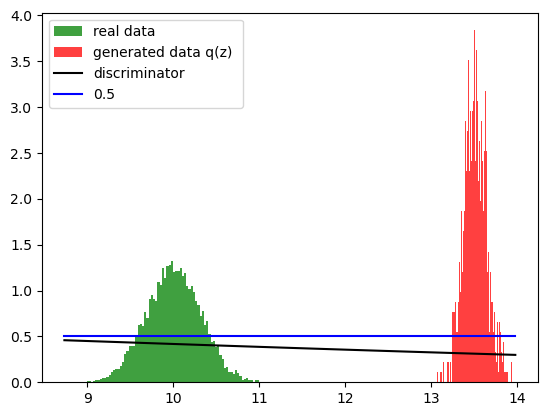

 15%|█▌        | 3/20 [00:02<00:14,  1.14it/s]

Epoch: 2


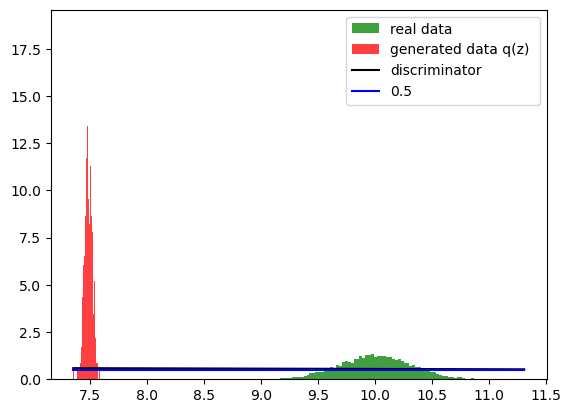

 20%|██        | 4/20 [00:03<00:12,  1.31it/s]

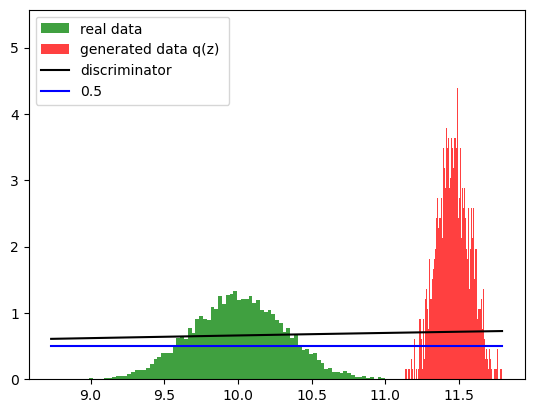

 25%|██▌       | 5/20 [00:03<00:11,  1.36it/s]

Epoch: 4


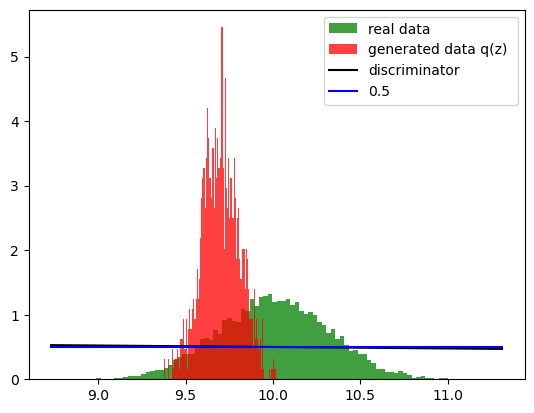

 30%|███       | 6/20 [00:04<00:10,  1.35it/s]

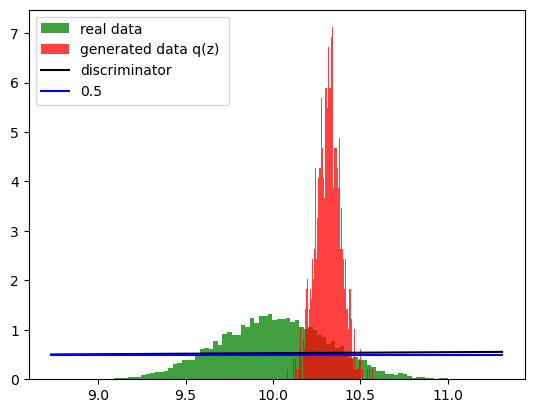

 35%|███▌      | 7/20 [00:05<00:08,  1.45it/s]

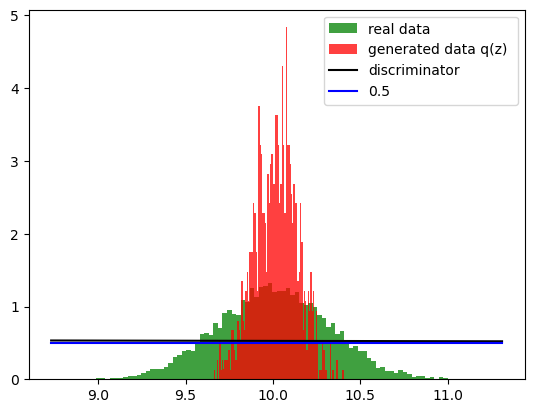

 40%|████      | 8/20 [00:05<00:07,  1.53it/s]

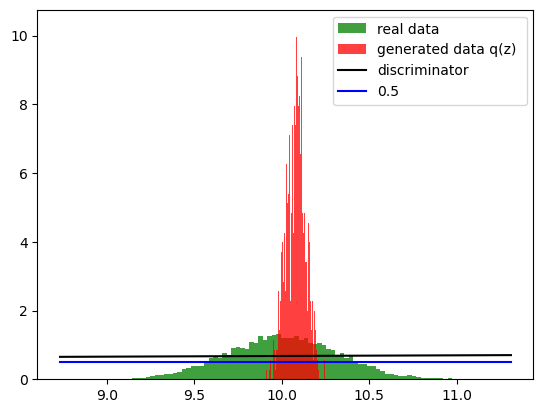

 45%|████▌     | 9/20 [00:06<00:07,  1.49it/s]

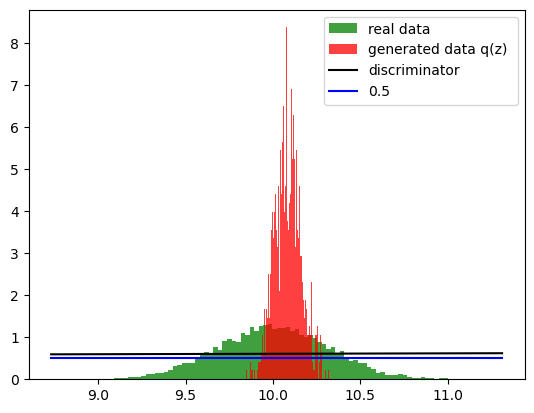

 50%|█████     | 10/20 [00:07<00:06,  1.55it/s]

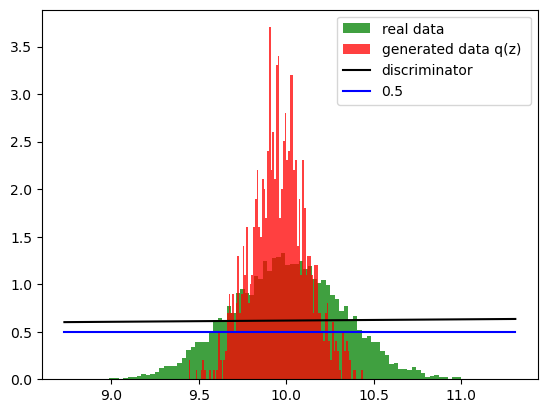

 55%|█████▌    | 11/20 [00:07<00:05,  1.60it/s]

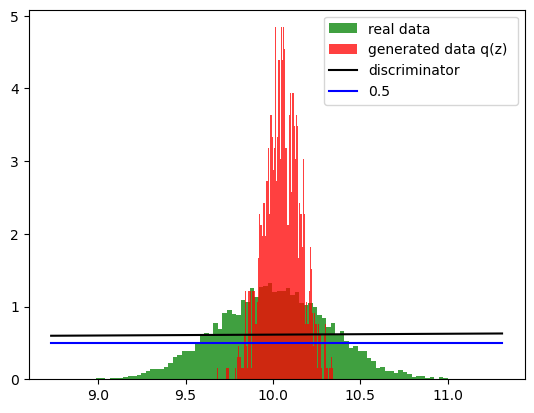

 60%|██████    | 12/20 [00:08<00:04,  1.62it/s]

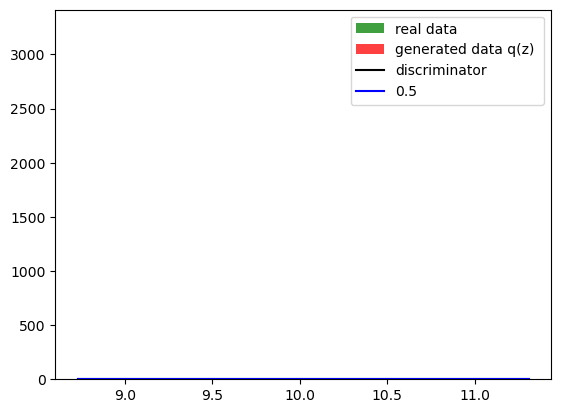

 65%|██████▌   | 13/20 [00:09<00:04,  1.48it/s]

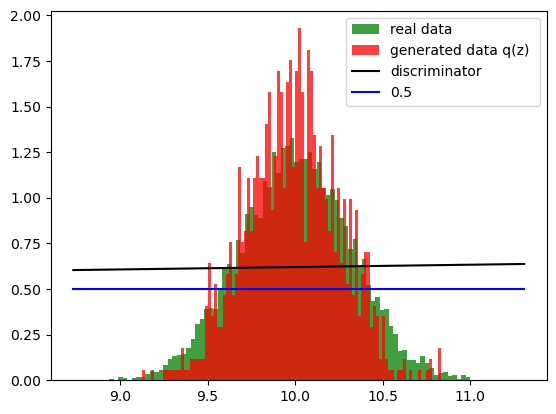

 70%|███████   | 14/20 [00:09<00:04,  1.49it/s]

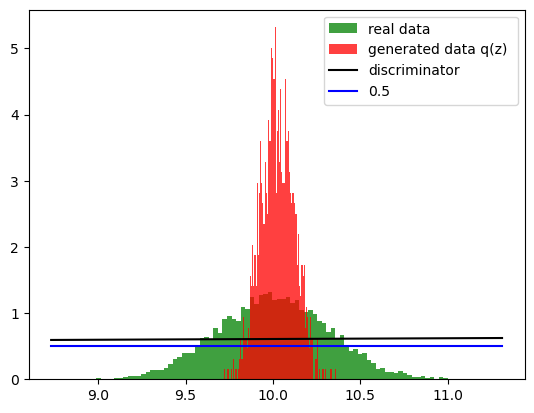

 75%|███████▌  | 15/20 [00:10<00:03,  1.53it/s]

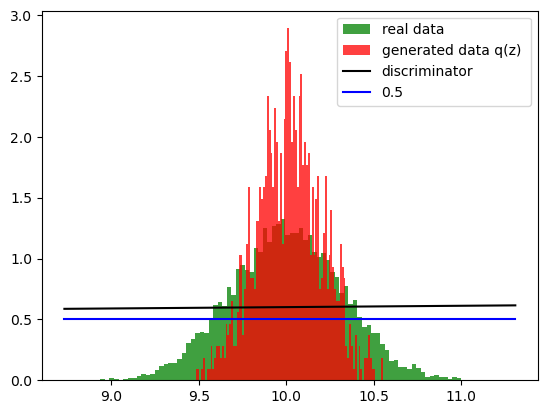

 80%|████████  | 16/20 [00:10<00:02,  1.58it/s]

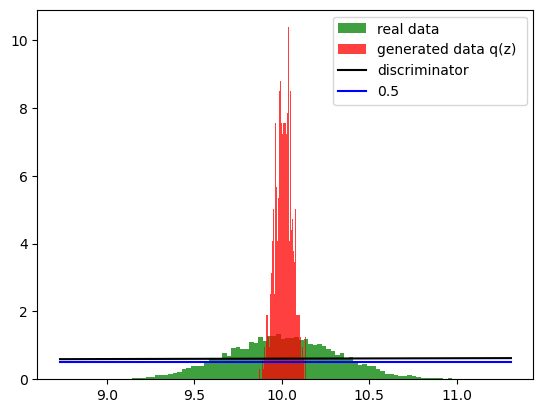

 85%|████████▌ | 17/20 [00:11<00:01,  1.53it/s]

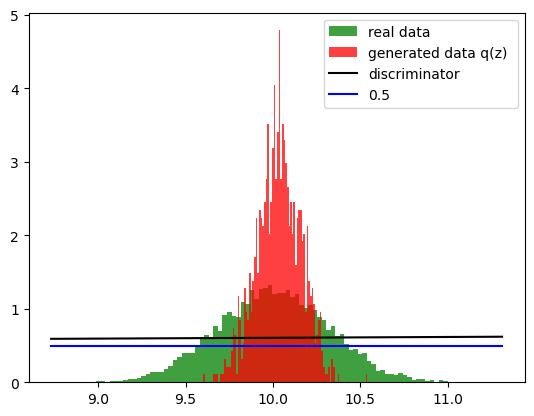

 90%|█████████ | 18/20 [00:12<00:01,  1.59it/s]

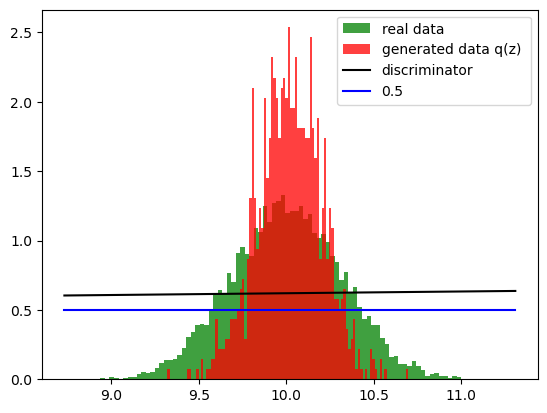

 95%|█████████▌| 19/20 [00:12<00:00,  1.61it/s]

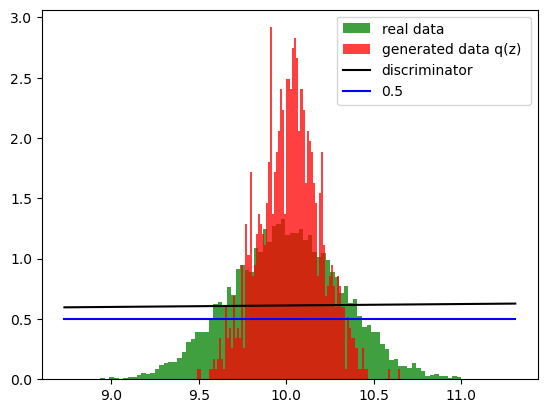

100%|██████████| 20/20 [00:13<00:00,  1.48it/s]


In [28]:
LOSS_G=[]
LOSS_D=[]

epochs=20

noise_dim=1
epsilon=100 

# Training loop
for epoch in tqdm(range(epochs)):
    # Plot the data distribution and generated samples
    Xhat=G(torch.randn(n_samples,1))
    plot_distribution(real_data=dataset.X, generated_data=Xhat.detach(), discriminator=D)
    
    # Training the discriminator
    for real_data in dataloader:
        noise = torch.randn(batch_size, 1)
        fake_data = G(noise)
        
        # Discriminator predictions for real and fake data
        real_predictions = D(real_data)
        fake_predictions = D(fake_data)
 
        # Discriminator loss for real and fake data
        loss_D_real = criterion(real_predictions, torch.ones(batch_size, 1))
        loss_D_fake = criterion(fake_predictions, torch.zeros(batch_size, 1))
        
        # Overall discriminator loss
        loss_D = (loss_D_fake + loss_D_real) / 2
        LOSS_D.append(loss_D.detach().item())
        
        # Backpropagation and optimizer update for discriminator
        D.zero_grad()
        loss_D.backward(retain_graph=True)
        optimizerD.step()
        
        # Training the generator
        output = D(fake_data)
        loss_G = criterion(output, torch.ones(batch_size, 1))
        LOSS_G.append(loss_G.detach().item())
    
        # Backpropagation and optimizer update for generator
        G.zero_grad()
        loss_G.backward()
        optimizerG.step()
    
    # Save and display the generator and discriminator if the performance increases 
    Xhat = G(torch.randn(len(dataset), 1))
    accuracy = abs(0.5 - get_accuracy(dataset.X, Xhat))
    if accuracy < epsilon:
        epsilon = accuracy
        torch.save(D.state_dict(), 'D.pth')
        torch.save(G.state_dict(), 'G.pth')
        print("Epoch:", epoch)

For more on training GANs check out the following <a href="https://jonathan-hui.medium.com/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01">blog</a>. We can display the best performing model


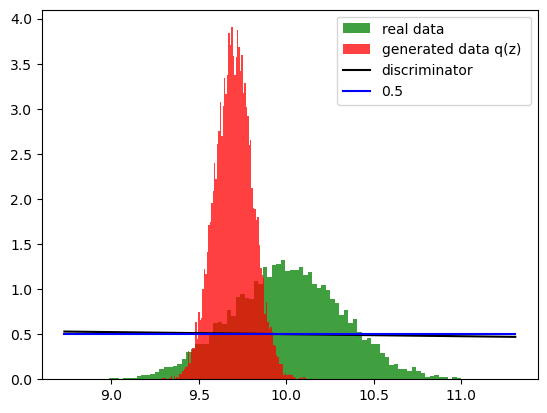

In [29]:
D=Discriminator()
D.load_state_dict(torch.load("D.pth"))
G=Generator()
G.load_state_dict(torch.load("G.pth"))

Xhat=G(torch.randn(len(dataset), 1))
plot_distribution(real_data=dataset.X, generated_data=Xhat.detach(), discriminator=D)

----


In the content above, you learned about the working mechanics of Generative Adversarial Networks (GANs) and their various applications, such as Image Generation. However, GANs have also been known to be unstable to train, and often, the generated images suffer from being noisy and incomprehensible.

For a improved result in the case example, we are applying Convolutional Neural Networks to GANS. They are called Deep Convolutional Generative Adversarial Networks (DCGANs). 
We will build and train DCGANs in the following content, using several approaches introduced in the original <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">DCGANs paper</a>. 



----


## Deep Convolutional Generative Adversarial Networks (DCGANs)


### Case background


In the case example, you work for an online anime video game company; the company would like to create a unique anime avatar for a game for each player. As there are millions of players, you must use a DCGANs to create each character.

The proposed approaches are summarized here:

- Replace any pooling layers with **strided convolutions (discriminator)** and **fractional-strided
convolutions (generator)**.
- Use **batchnorm** in both the generator and the discriminator.
- **Remove fully connected hidden layers** for deeper architectures.
- Use **ReLU** activation in generator for all layers except for the output, which uses **Tanh**.
- Use **LeakyReLU** activation in the discriminator for all layers except for the output, which uses **Sigmoid**.
- Use **Adam optimizer**.  

These approaches will result in more stable training of deeper generative models.


### Loading the Dataset

We will mainly work with the Anime Face dataset from [Kaggle](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01). The original dataset has 63,632 "high-quality" anime faces, but to make the models train faster in this lab, we randomly sampled 20,000 images and prepared a dataset called `cartoon_20000`. 

Let's download the smaller dataset using the Skills Network library's `prepare` function:


In [30]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module6/cartoon_20000.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

  0%|          | 0/20001 [00:00<?, ?it/s]

Saved to '.'


Anime Face or Cartoon images are stored in the `cartoon_2000 folder`, which is assumed to be in the current working directory. As a preprocessing step, any files in the folder that are not in proper image format (based on the file extensions) have been removed. Additionally, any duplicate images have also been eliminated.


### Creating Data Generator


First, we declare some properties of our images, including image height, image width, and batch size.


In [31]:
img_height, img_width, batch_size=64,64,128

We create a dataset class and object for the iamges 


In [32]:
current_directory = os.getcwd()
directory=os.path.join(current_directory ,'cartoon_20000')
[filename for filename in os.listdir(directory) if filename.endswith('.jpg') ]

class Dataset(Dataset):
    def __init__(self, transform=None):
      current_directory = os.getcwd()
      directory=os.path.join(current_directory ,'cartoon_20000')

      self.file_paths = [os.path.join(directory,filename ) for filename in os.listdir(directory) if filename.endswith('.jpg') ]
      self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, index):
        image_path = self.file_paths[index]
        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image

In [33]:
dataset=Dataset()

We can plot some of the images.


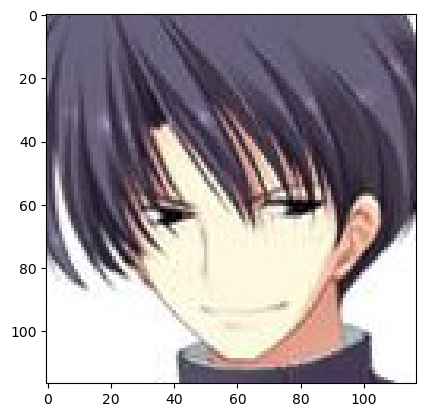

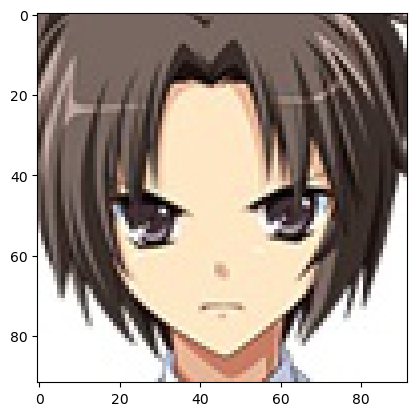

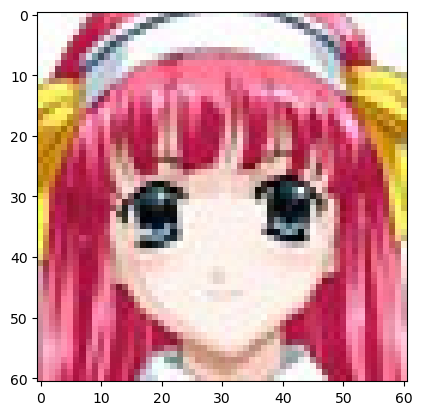

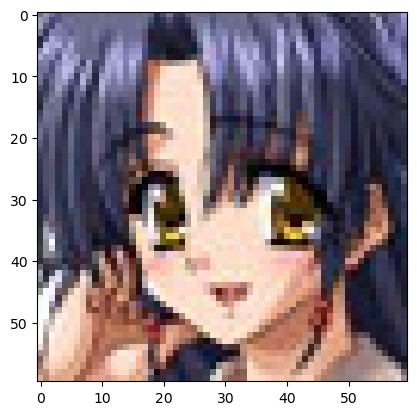

In [34]:
for i in range(1,5):
  plt.imshow(dataset[i])
  plt.show()

Data augmentation is a widely used technique in machine learning, including for GANs, where existing data is modified or transformed to create additional samples with increased diversity. In GANs, data augmentation involves applying transformations to both real data and generated samples to introduce variations and enhance the model's ability to capture different aspects of the underlying data distribution. By augmenting the real data, the GAN model is exposed to a wider range of variations, enabling it to learn more robust representations and generate more diverse outputs. Similarly, augmenting the generated samples helps make them more realistic and diverse, avoiding mode collapse. By incorporating random transformations during training, data augmentation in GANs enhances the training data, leading to improved performance and generalization capabilities of the model.

The following code resizes the image to the specified image_size, ensuring its dimensions match. Then, it is center-cropped to the same image_size, which helps remove any unwanted background or padding. After that, the image is converted to a tensor, which is the expected format for most deep learning models. Lastly, the pixel values are normalized using the specified mean and standard deviation (0.5, 0.5, 0.5) to (0.5, 0.5, 0.5), bringing them into the range of [-1, 1]. These comments provide an understanding of each transformation's purpose and how they contribute to preprocessing the image data.


In [35]:
image_size = 64
transform=transforms.Compose([
                               transforms.Resize((64, 64)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

We create a dataset object and pass the transform object as an argument. This ensures that the defined transformations, such as resizing, cropping, converting to a tensor, and normalizing, are applied to each data sample in the dataset.


In [36]:
dataset=Dataset(transform=transform)

Create the dataloader.


In [37]:
# Create the dataloader
# batch_size Batch size during training
batch_size = 128
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,shuffle=True)

**(OPTIONAL)** Decide which device we want to run on a GPU


In [38]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
device

device(type='cpu')

Let's take one batch of images for displaying:


In [39]:
real_batch = next(iter(dataloader))
real_batch.shape

torch.Size([128, 3, 64, 64])

We can then plot 64 images from the batch  


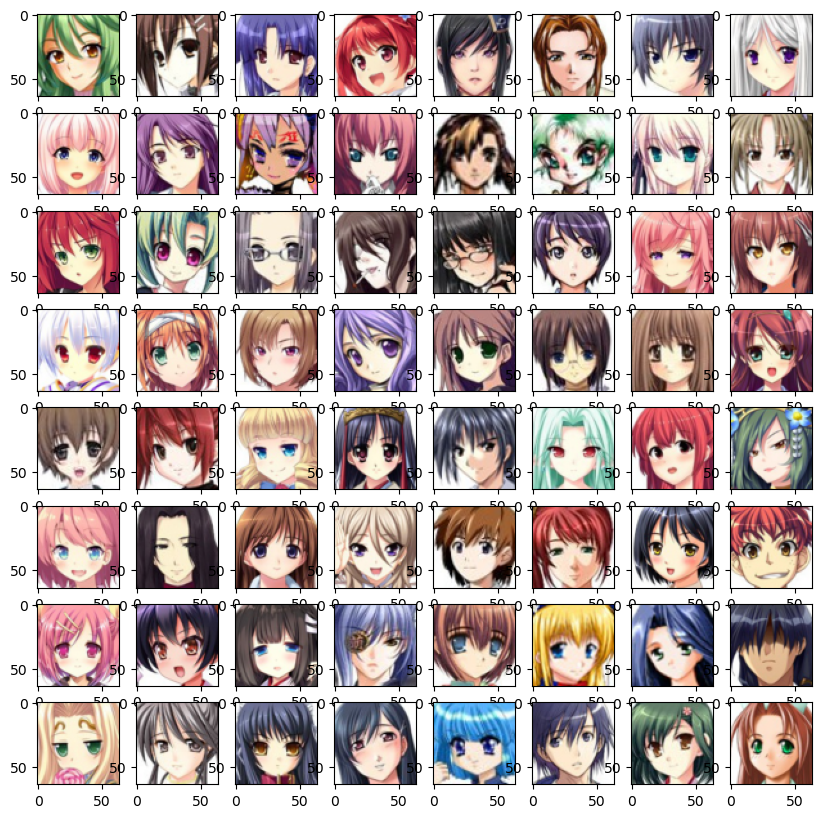

In [40]:
plot_image_batch(real_batch)

###  Generator and Discriminator (for DCGANs)


___Building the Generator___


The Generator is comprised of several layers of transposed convolution, the opposite of convolution operations.

- Each Conv2DTranspose layer (except the final layer) is followed by a Batch Normalization layer and a **Relu activation**; for more implementation details, check out <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a>. 
- The final transpose convolution layer has three output channels since the output needs to be a color image. We use the **Tanh activation** in the final layer. 

See the illustration of the architecture from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a> below.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/generator.png" alt="generator image" width="80%"></center>


We build the Generator network by using the parameter values from <a href="https://learnopencv.com/deep-convolutional-gan-in-pytorch-and-tensorflow/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01" >[3]<a>.


In [41]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Block 1:input is Z, going into a convolution
            nn.ConvTranspose2d(latent_vector_size, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            # Block 2: input is (64 * 8) x 4 x 4
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            # Block 3: input is (64 * 4) x 8 x 8
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            # Block 4: input is (64 * 2) x 16 x 16
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Block 5: input is (64) x 32 x 32
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # Output: output is (3) x 64 x 64
        )
 
    def forward(self, input):
        output = self.main(input)
        return output    

Let's proceed with creating our generator object. We'll define a class named


In [42]:
latent_vector_size=128

G = Generator().to(device)
print(G)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


___Building the Discriminator___


The Discriminator has five convolution layers. 

- All but the first and final Conv2D layers have Batch Normalization, since directly applying batchnorm to all layers could result in sample oscillation and model instability; 
- The first four Conv2D layers use the **Leaky-Relu activation** with a slope of 0.2. 
- Lastly, instead of a fully connected layer, the  output layer has a convolution layer with a **Sigmoid activation** function.


In [43]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Block 1: input is (3) x 64 x 64
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 2: input is (64) x 32 x 32
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 3: input is (64*2) x 16 x 16
            nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 4: input is (64*4) x 8 x 8
            nn.Conv2d(64 * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # Block 5: input is (64*8) x 4 x 4
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
            nn.Flatten()
            # Output: 1
        )
 
    def forward(self, input):
        output = self.main(input)
        return output

By printing the summary of the Discriminator architecture, we can see that the strided convolutions **downsample** an input image of size 64 x 64 x 3.


In [44]:
D =Discriminator().to(device)
print(D)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
    (13): Flatten(start_dim=1, end_d

### Defining Loss Functions

As we discussed in the previous section, the min-max optimization problem can be formulated by minimizing the cross-entropy loss for the Generator and Discriminator. We will use the same loss as mentioned earlier.


### Defining Optimizers 
 
We create two Adam optimizers for the discriminator and the generator, respectively. We pass the following arguments to the optimizers:

- learning rate of 0.0002.
- beta coefficients $\beta_1 = 0.5$ and $\beta_2 = 0.999$, which are responsible for computing the running averages of the gradients during backpropagation.


### Defining Learning Rate Scheduler - StepLR
The learning rate scheduler is a feature provided by the PyTorch library. It allows for the adjustment of the learning rate of an optimizer at specific intervals or epochs during the training process.

- optimizer: The optimizer object for which the learning rate will be adjusted.
- step_size: The number of epochs after which the learning rate will be decreased.
- gamma: The factor by which the learning rate will be multiplied.

During training, you can update the learning rate by calling the step() method of the scheduler at the end of each epoch.


In [45]:
learning_rate = 0.0002
G_optimizer = optim.Adam(G.parameters(), lr = learning_rate, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr = learning_rate, betas=(0.5, 0.999))
scheduler_G = lr_scheduler.StepLR(G_optimizer, step_size=10, gamma=0.1)
scheduler_D = lr_scheduler.StepLR(D_optimizer, step_size=10, gamma=0.1)
device

device(type='cpu')

In [46]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias) 

D.apply(weights_init)
G.apply(weights_init)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

Don't be intimidated by the code above, here is a summary of what a train step accomplishes:

- First, we sample `z`, a batch of noise vectors from a normal distribution ($\mu = 1, \sigma = 1$) and feed it to the Generator.
- The Generator produces generated or "fake" images `xhat`.
- We feed real images `X` and fake images `xhat` to the Discriminator and obtain `real_output` and `fake_output` respectively as the scores.
- We calculate Generator loss `gen_loss` using the `fake_output` from Discriminator since we want the fake images to fool the Discriminator as much as possible.
- We calculate Discriminator loss `disc_loss` using both the `real_output` and `fake_output` since we want the Discriminator to distinguish the two as much as possible.
- We calculate `gradients_of_generator` and  `gradients_of_discriminator` based on the losses obtained.
- Finally, we update the Generator and Discriminator by letting their respective optimizers apply the processed gradients on the trainable model parameters.


We can transform the random noise using the generator. As the generator is not trained yet, the output appears to be noises:


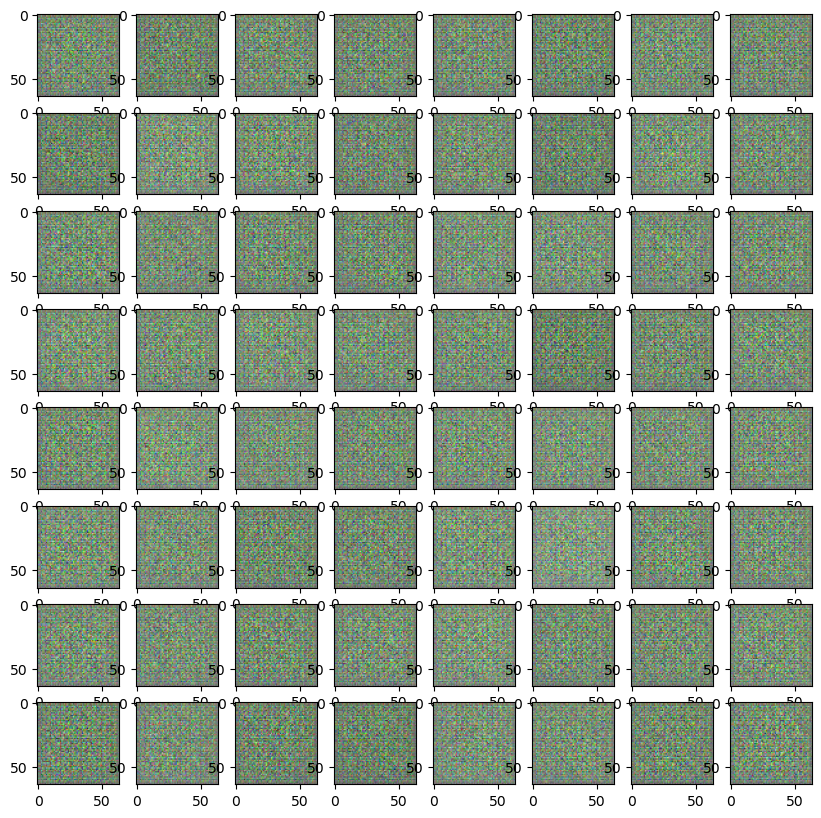

In [47]:
noise =  torch.randn(batch_size , latent_vector_size, 1, 1, device=device)
Xhat = G(noise).detach()
plot_image_batch(Xhat)

### Training DCGANs


As this method is computationally intensive, we will train the model for one epoch and then use the generator to produce artificial images.

__Even 1 epoch in DCGANs training takes long time.__ You can __stop the training__ here and import the pre-trained model following the instruction below.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
LOSS_G = []
LOSS_D = []
epochs = 1
epsilon = 100

# Training loop
for epoch in tqdm(range(epochs)):
    print(epoch)
    for real_data in dataloader:
        real_data = real_data.to(device)
        noise =torch.randn(batch_size  , latent_vector_size , 1, 1, device=device)
        fake_data = G(noise)
        
        # Discriminator predictions for real and fake data
        real_predictions = D(real_data)
        fake_predictions = D(fake_data)
 
        # Discriminator loss for real and fake data
        loss_D_real = criterion(real_predictions, torch.ones(len(real_predictions), 1).to(device))
        loss_D_fake = criterion(fake_predictions, torch.zeros(len(fake_predictions), 1).to(device))
        
        # Overall discriminator loss
        loss_D = (loss_D_fake + loss_D_real) / 2
        LOSS_D.append(loss_D.detach().item())
        
        # Backpropagation and optimizer update for discriminator
        D.zero_grad()
        loss_D.backward(retain_graph=True)
        D_optimizer.step()
        
        # Training the generator
        output = D(fake_data)
        loss_G = criterion(output, torch.ones(len(output), 1).to(device))
        LOSS_G.append(loss_G.detach().item())
    
        # Backpropagation and optimizer update for generator
        G.zero_grad()
        loss_G.backward()
        G_optimizer.step()
    
    # Using LR Scheduler
    scheduler_G.step()
    scheduler_D.step()
    
    # Displaying Images
    Xhat = G(noise).to(device).detach()
    plot_image_batch(Xhat)
    print("Epoch:", epoch)
    
    # Saving the model
    torch.save(D.state_dict(), 'D.pth')
    torch.save(G.state_dict(), 'G.pth')

  0%|          | 0/1 [00:00<?, ?it/s]

0


Load the pre-trained generator:


In [ ]:
D = Discriminator()
D.load_state_dict(torch.load("D_trained.pth", map_location=torch.device('cpu')))
G = Generator()
G.load_state_dict(torch.load("G_trained.pth", map_location=torch.device('cpu')))

Let's generate several images using the fully trained Generator and display them:


In [ ]:
latent_vector_size=128
z =  torch.randn(batch_size  , latent_vector_size , 1, 1)

Xhat=G(z).detach()
plot_image_batch(Xhat)

## Explore Latent Variables 

Values of $\mathbf{z}$ that are relatively close together will produce similar images. For example, we can assigns elements of $\mathbf{z}$ close values such as $[1,0.8,..,0.4]$. 


### Exercise 1

Plot the generated images by the Generator with the following steps -

- Iterate over the values in the list [1, 0.8, 0.6, 0.4] using a variable **`c`**.
- Inside the loop, generate a random tensor **`z`** using **`torch.randn(batch_size, latent_vector_size, 1, 1)`** . The size of the tensor is determined by the values of **`batch_size`** and **`latent_vector_size`**.
- Print the value of **`c`** using the statement **`print("the value of c is ", c)`**.
- Calculate **`Xhat`** by multiplying **`c`** with **`z`** and passing the result to a function **`G()`** . The **`detach()`** method is used to detach **`Xhat`** from the computation graph.
- Call the **`plot_image_batch()`** function, passing **`Xhat`** as an argument. This function likely plots the batch of images represented by **`Xhat`**.
- Repeat the steps above for each value in the list [1, 0.8, 0.6, 0.4].


In [ ]:
# Write your code here
for c in [1,0.8,0.6,0.4]:
    z =  torch.randn(batch_size, latent_vector_size, 1, 1)
    print("the value of c is ", c)

    Xhat=G(c*z).detach()
    plot_image_batch(Xhat)

<details>
    <summary>Click here for Solution</summary>

```python
for c in [1,0.8,0.6,0.4]:
    z =  torch.randn(batch_size, latent_vector_size, 1, 1)
    print("the value of c is ", c)

    Xhat=G(c*z).detach()
    plot_image_batch(Xhat)
 ```   

</details>


We can see how changing the latent variable changes the generated image. Here we alter more and more subsequent values of $\mathbf{z}$ from 1 to -1;


### Exercise 2

Set the latent variable $z[0, 0:10*n, 0, 0] = -0.5*n$ each time `for n in range(5)`and see how the characteristics change. Follow the instructions 
- Set the desired seed value to ensure reproducibility of random number generation **`seed_value = 42`**.
- Set the seed for generating random numbers using the **`torch.manual_seed()`** function from PyTorch.
- Generate a random noise vector 'z' using **`torch.randn()`**.
- Create an instance of the **`ToPILImage`** class to convert the generated image to a PIL Image object.
- Start a loop that iterates 5 times.
- Modify elements of **`z`** by setting a portion of elements from $z[0, 0:10*n, 0, 0] = -0.5*n$.
- Generate an image with the modified **`z`** by passing it to the generator model **`G`** . The result is stored in **`Xhat`**.
- Normalize the generated image by scaling it to the range [0, 1].
- Display the generated image using **`plt.imshow()`** and **`plt.show()`** to visualize the result.


In [ ]:
# Write your code here
seed_value = 42

# Set the seed for generating random numbers
torch.manual_seed(seed_value)

# Generate a random noise vector 'z'
z = torch.randn(1, latent_vector_size, 1, 1)

# Create an instance of the 'ToPILImage' class
to_pil_image = ToPILImage()

for n in range(5):
    
    # Modify elements of 'z'
    z[0, 0:10*n, 0, 0]= -0.5*n
        
    # Generate an image with the modified 'z'
    Xhat=G(z).detach().squeeze(0)
    
    # Normalize the generated image
    Xhat = (Xhat + 1) / 2

    print("elements from 0 to {} is set to -1".format(10*n))
    plt.imshow(to_pil_image(Xhat))
    plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
# Set the desired seed value
seed_value = 42

# Set the seed for generating random numbers
torch.manual_seed(seed_value)

# Generate a random noise vector 'z'
z = torch.randn(1, latent_vector_size, 1, 1)

# Create an instance of the 'ToPILImage' class
to_pil_image = ToPILImage()

for n in range(5):
    
    # Modify elements of 'z'
    z[0, 0:10*n, 0, 0]= -0.5*n
        
    # Generate an image with the modified 'z'
    Xhat=G(z).detach().squeeze(0)
    
    # Normalize the generated image
    Xhat = (Xhat + 1) / 2

    print("elements from 0 to {} is set to -1".format(10*n))
    plt.imshow(to_pil_image(Xhat))
    plt.show()
 ```   

</details>


We can also hold some of the elements of $\mathbf{z}$ constant and randomly change others. Here, we set the first 20 elements to one and randomly change the rest. We see that all through the images, the hair color remains same but characteristics change.


### Exercise 3

Repeat the procedure above, but set the elements of $\mathbf{z}$ from index 0 to 35 to -1. The character will change completely by the end.


In [ ]:
# Write your code here
# Set the desired seed value
seed_value = 42

# Set the seed for generating random numbers
torch.manual_seed(seed_value)

# Generate a random noise vector 'z'
z = torch.randn(1, latent_vector_size, 1, 1)

# Create an instance of the 'ToPILImage' class
to_pil_image = ToPILImage()
for n in range(5):
    
    # Modify elements of 'z'
    z[0, 0:35*n, 0, 0]= -1
    
    # Generate an image with the modified 'z'
    Xhat=G(z).detach().squeeze(0)
    
    # Normalize the generated image
    Xhat = (Xhat + 1) / 2
    
    print("elements from 0 to {} is set to -1".format(10*n))
    plt.imshow(to_pil_image(Xhat))
    plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
# Set the desired seed value
seed_value = 42

# Set the seed for generating random numbers
torch.manual_seed(seed_value)

# Generate a random noise vector 'z'
z = torch.randn(1, latent_vector_size, 1, 1)

# Create an instance of the 'ToPILImage' class
to_pil_image = ToPILImage()
for n in range(5):
    
    # Modify elements of 'z'
    z[0, 0:35*n, 0, 0]= -1
    
    # Generate an image with the modified 'z'
    Xhat=G(z).detach().squeeze(0)
    
    # Normalize the generated image
    Xhat = (Xhat + 1) / 2
    
    print("elements from 0 to {} is set to -1".format(10*n))
    plt.imshow(to_pil_image(Xhat))
    plt.show()
 ```   

</details>


__Thank you for completing this lab!__
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown5.jpeg" width="500px"></center>


----


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Joseph Santarcangelo</a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.

[Junxing(J.C.) Chen](https://www.linkedin.com/in/junxing-chen-3591a4162/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01) is a Data Scientist at IBM with strong interests in machine learning and cutting-edge technologies.

[Roodra Kanwar](https://www.linkedin.com/in/roodrakanwar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0A52EN3517-2023-01-01) is working as a Data Scientist at IBM and has previous experience in machine learning and data engineering.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description |
| ----------------- | ------- | ----------- | ------------------ |
| 2022-08-30        | 0.1     | Joseph Santarcangelo  | Created Lab       |
| 2022-09-06        | 0.1     | Roxanne Li  | Reviewed and edited Lab       |
| 2022-09-23        | 0.1     | Steve Hord  | QA pass edits                 |
| 2022-10-11        | 0.2     | Junxing(J.C.) Chen  | Reviewed and edited Lab       |
| 2023-06-19        | 0.3     | Roodra Kanwar  | Reviewed and updated Lab       |


Copyright © 2023 IBM Corporation. All rights reserved.
